# Set up
 

In [ ]:
drive.mount('/content/drive')
%cd '/content/drive/My Drive/CSC420'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/CSC420


In [ ]:
from google.colab import drive
import cv2
import math
import statistics
import collections 
from matplotlib import pyplot as plt
import numpy as np

# Step 1 : Gaussian Blur 

Text(0.5, 1.0, 'Filtered image')

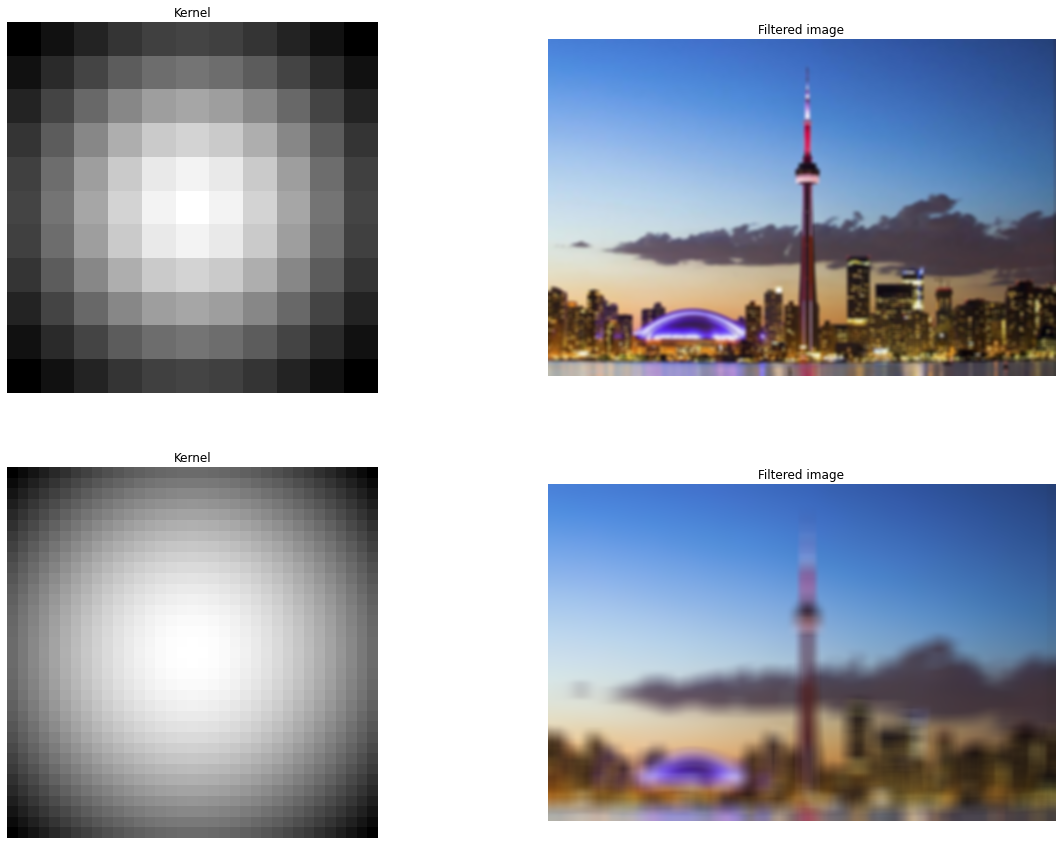

In [ ]:
def gaussian_formula(std_dev, u, v): 
    return (1/ (std_dev**2 * math.pi * 2))*(math.exp((-1)*(u**2 + v**2)/(std_dev**2)))


def get_gaussian_kernel(size, std_dev):
  if size % 2 == 0:
    # we cant have even dimensions 
    return 0 
  output = list ()
  for i  in range(-math.floor(size/2)  , math.ceil(size/2)):
    for j in range (-math.floor(size/2)  , math.ceil(size/2)):
      output.append(gaussian_formula(std_dev, i, j))

  normalizer = sum(output)
  output = [x/normalizer for x in output]
  return np.reshape(output, (size,size))


# Filter 2D Only used here for testing
# not part of any actual code !

kernel = get_gaussian_kernel(11,5)
image1 = cv2.imread('Q4_image_1.jpg')[...,::-1]
image_fil = cv2.filter2D(image1 , -1, kernel)

plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
plt.imshow(kernel, cmap='gray')
plt.axis('off')
plt.title('Kernel')

plt.subplot(2,2,2)
plt.imshow(image_fil, cmap='gray')
plt.axis('off')
plt.title('Filtered image')

kernel = get_gaussian_kernel(35,30)
image1 = cv2.imread('Q4_image_1.jpg')[...,::-1]
image_fil = cv2.filter2D(image1 , -1, kernel)


plt.subplot(2,2,3)
plt.imshow(kernel, cmap='gray')
plt.axis('off')
plt.title('Kernel')

plt.subplot(2,2,4)
plt.imshow(image_fil, cmap='gray')
plt.axis('off')
plt.title('Filtered image')



# Step 2: Gradient Magnitude w/ Sobel 

Text(0.5, 1.0, 'Convolve image')

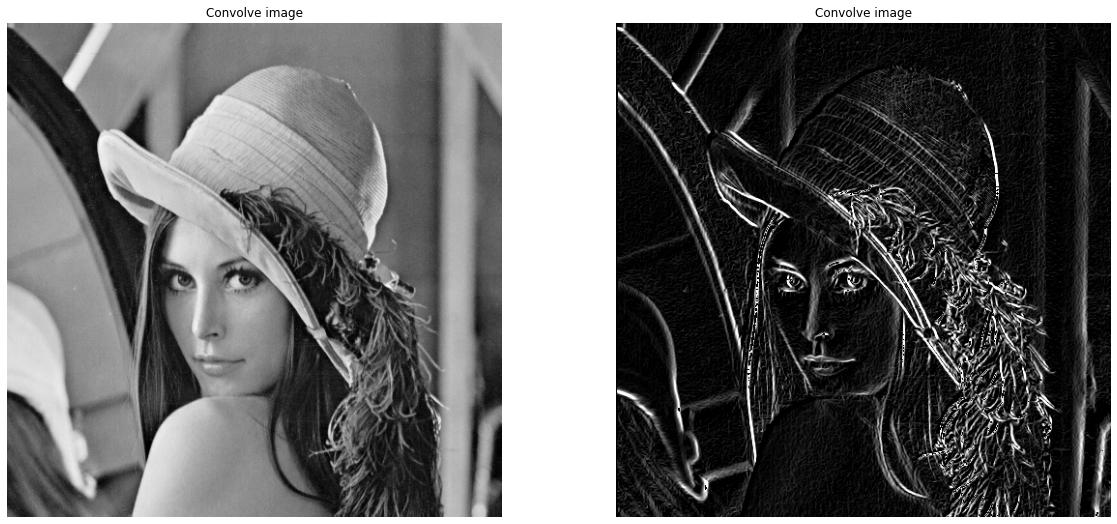

In [ ]:
def convolve(input_image, filter ):
  dims = input_image.shape
  input_dtype = input_image.dtype
  k  = filter.shape[0]//2

  H, W = dims[0], dims[1]
  padded_image = np.zeros(shape=(2*k+H,2*k+W), dtype=input_dtype)
  padded_image[k:k+H,k:k+W]=input_image
  output_image = np.zeros(shape=(H, W), dtype=input_dtype)
  
  for i in range(k, H):
    for j in range (k, W):
      # start convolution image 
      conv_val = 0 
      for u in range (-k,k+1):
        for v in range(-k,k+1):
          conv_val += filter[u+k][v+k]*padded_image[i-u][j-v]
      if (conv_val < 0):
        conv_val = 0 
      elif conv_val > 255:
        conv_val = 255
      output_image[i,j] = conv_val 
  return output_image 

def sobel(input_image):
  input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
  input_dtype = input_image.dtype
  sobel_x = np.array([-1, 0, 1 , -2, 0, 2, -1, 0, 1]).reshape(3,3)
  sobel_y = np.array([-1, -2, -1 , 0 ,0 ,0 , 1 ,2 ,1]).reshape(3,3)
  dims = input_image.shape
  H, W = dims[0], dims[1]

  output_image = np.zeros(shape=(H, W) , dtype=input_dtype)
  sobel_imagex = convolve(input_image ,sobel_x)
  sobel_imagey =convolve(input_image , sobel_y)
  for i in range(0, H):
    for j in range (0, W):
      output_image[i,j] = math.sqrt((sobel_imagex[i,j])**2 + (sobel_imagey[i,j])**2)

  return output_image 

image1 = cv2.imread('LENNA.jpeg')[...,::-1]

plt.figure(figsize=(20,20))

plt.subplot(2,2,3)
plt.imshow(image1, cmap='gray')
plt.axis('off')
plt.title('Convolve image')

plt.subplot(2,2,4)
plt.imshow(sobel(image1), cmap='gray')
plt.axis('off')
plt.title('Convolve image')




# Step 3: Threshold Algorithm

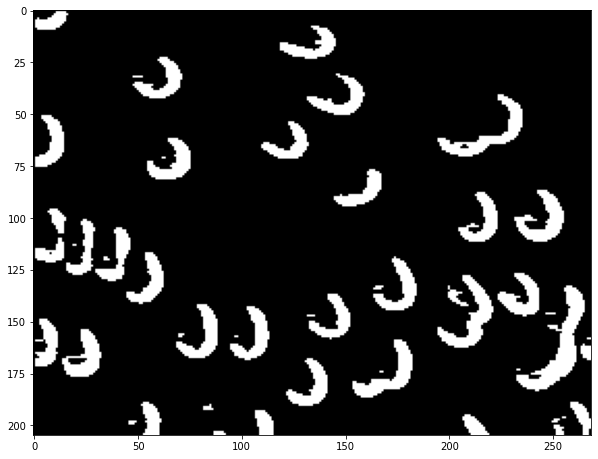

In [ ]:
def find_threshold(sobel_image):
  dims = sobel_image.shape
  H, W = dims[0], dims[1]

  # 1 for upper, 0 for lower
  threshold_new = 0 
  for i in range(0, H):
    for j in range (0, W):
      threshold_new += sobel_image [i][j]

  threshold_new = threshold_new / (H*W)
  threshold = 0 

  # Using a very small threshold for 0, instead of actual 0 since python 0 goes 
  # upto 2.2250738585072014e-308 
  while abs(threshold_new - threshold) > 0.000001:
    upper = list()
    lower = list()
    threshold = threshold_new 

    for i in range(0, H):
      for j in range (0, W):
        if sobel_image[i,j] < threshold: 
          lower.append(sobel_image[i,j])
        else: 
          upper.append(sobel_image[i,j])

    threshold_new = statistics.mean(upper) + statistics.mean(lower)
    threshold_new = threshold_new/2 
  return threshold_new


def enforce_threshold(sobel_image, threshold):
  dims = sobel_image.shape
  H, W = dims[0], dims[1]
  for i in range(0, H):
    for j in range (0, W):
      if (sobel_image [i][j] < threshold ):
        sobel_image [i][j] = 0 
      else: 
        sobel_image [i][j] = 1 
  return sobel_image

image1 = cv2.imread('Q6.png')[...,::-1]
plt.figure(figsize=(10,10))
image1= cv2.GaussianBlur(image1,(11,3),0)
grey_scale = sobel(image1)
plt.imshow(enforce_threshold(grey_scale, find_threshold( grey_scale)), cmap='gray')



# Step 4: Test


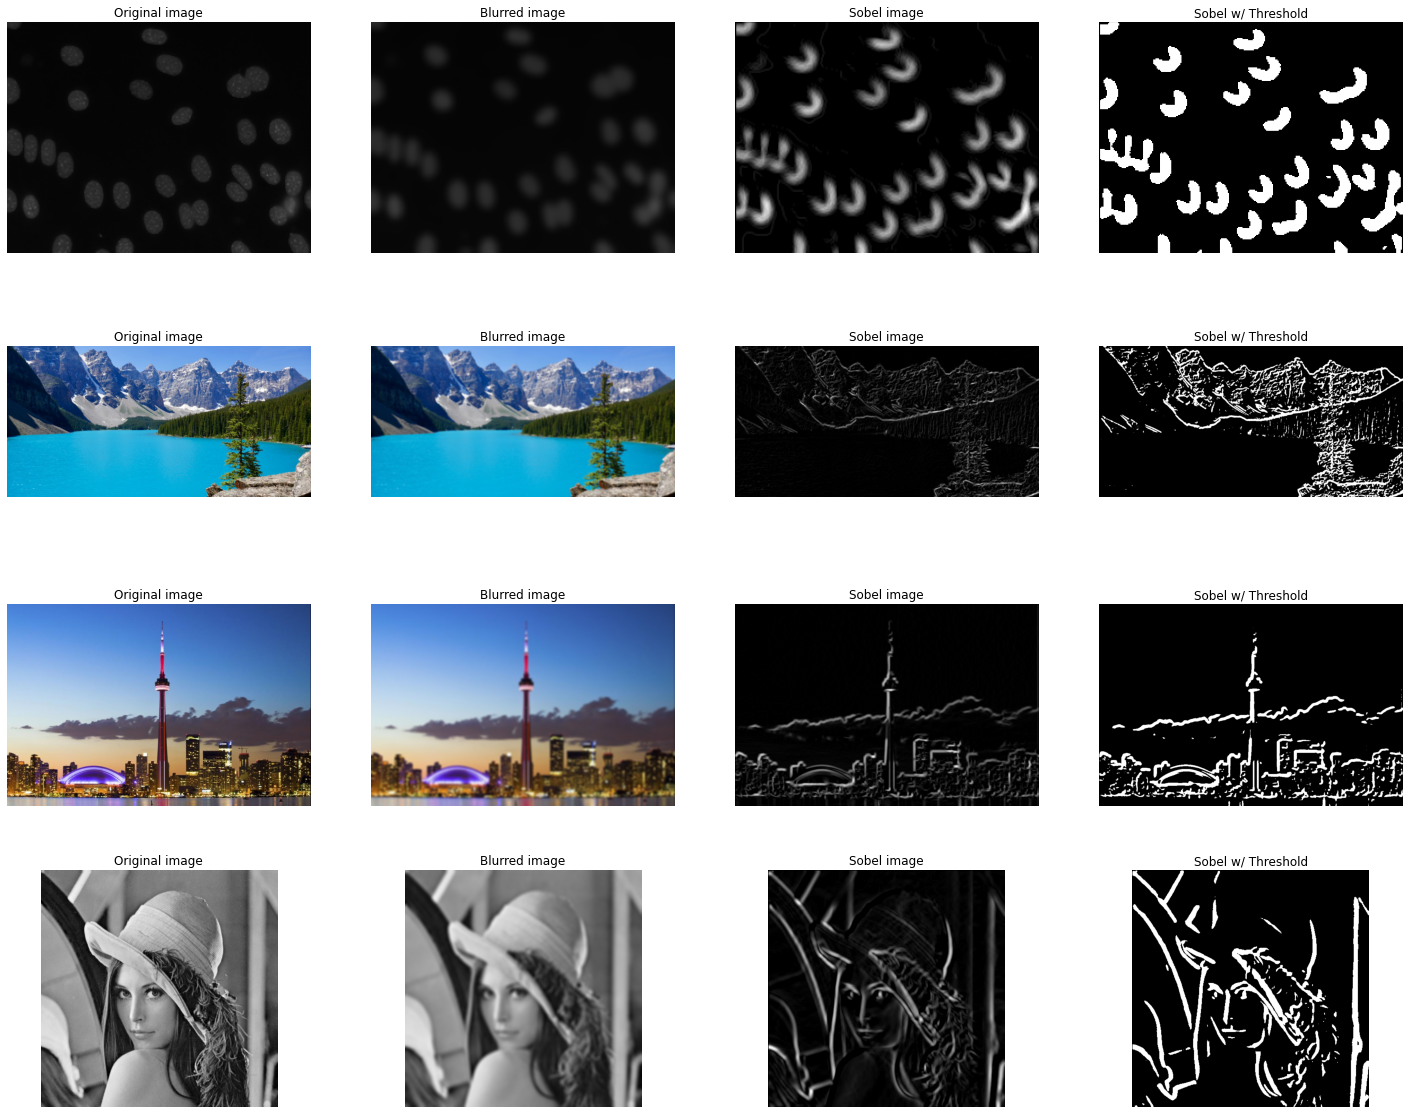

In [ ]:
# plt.imshow(enforce_threshold(grey_scale, find_threshold( grey_scale)), cmap='gray')



kernel = get_gaussian_kernel(11,5)
plt.figure(figsize=(25,20))

images = ['LENNA.jpeg', 'Q4_image_1.jpg',  'Q4_image_2.jpg', 'Q6.png' ]
i = 1
while (i <= 16 ):
  image1 = cv2.imread(images.pop())[...,::-1]

  plt.subplot(4,4,i)
  plt.imshow(image1, cmap='gray')
  plt.axis('off')
  plt.title('Original image')
  i+=1 

  # Using filter2d here for testing only! , to show the Gaussian 
  # kernel created, Sobel implements its own Convolution as required
  blurred = cv2.filter2D(image1,-1,  kernel )
  plt.subplot(4,4,i)
  plt.imshow(blurred , cmap='gray')
  plt.axis('off')
  plt.title('Blurred image')
  i+=1 

  sobel_image = sobel(blurred)
  plt.subplot(4,4,i)
  plt.imshow(sobel_image, cmap='gray')
  plt.axis('off')
  plt.title('Sobel image')
  i+=1 

  threshold_image = enforce_threshold(sobel_image, find_threshold(sobel_image))
  plt.subplot(4,4,i)
  plt.imshow(threshold_image, cmap='gray')
  plt.axis('off')
  plt.title('Sobel w/ Threshold')
  i+=1 




## Observations
For images with a lot of detail, Sobel seems to have a harder time distinguishing textures from actual edges. For the example with the Mountains, it doesnt seem to be good at getting the border between the lake and the mountains. Maybe this is an indication that sobel may not be the best solution when there is a lot of noise. As mentioned, it is interesting that the lake is not shown on the sobel operator, maybe there are better edge detection solutions?

Since quite a heavy amount of blurring is required to avoid the texture being picked up by the Sobel operator, some of the cells seem to have merged together.

# Connected Componenent Labeling & Cell count

In [ ]:
def connected_components (image):
  dims = image.shape
  H, W = dims[0], dims[1]
  numbering = np.zeros(shape=(H, W) , dtype=image.dtype)
  label = 1;
  foreground = False
  pixels = collections.deque([(0,0)])

  remaining = set()
  for i in range (0, H):
    for j in range(0, W):
      remaining.add((i,j))

  while pixels:
    pixel = pixels.popleft()
    i = pixel[0]
    j = pixel[1]
    if image[i,j] != 0 and numbering[i,j] == 0: 
      foreground = True 
      numbering[i,j] = label
      if (i,j) in remaining:
        remaining.remove((i,j))
      pixels.appendleft((i,j))

      for x_iter in range (-1, 2):
        for y_iter in range (-1, 2):
          if not (x_iter == 0 and y_iter == 0 ):
            x = pixel[0] + x_iter 
            y = pixel[1] + y_iter

            if valid_coordinate(x ,y, H , W):
              if image[x,y] != 0 and numbering[x,y] == 0: 
                pixels.appendleft((x,y))
      
    elif numbering[i,j] == 0: 
        numbering[i,j] = -1 
        if (i, j) in remaining:
          remaining.remove((i,j))

    if not pixels:
      if foreground:
        label+=1  
        foreground = False

      if remaining: 
        a = remaining.pop()
      else: 
        return label-1 
      pixels.append(a)

def valid_coordinate (i , j, H , W):
  if (i >= H or j >= W):
    return False
  if i <  0 or j < 0:
    return False   
  return True 

def get_next_coordinate(numbering):
  dims = numbering.shape
  H, W = dims[0], dims[1]
  for i in range(0 ,H):
    for j in range (0, W):
      if numbering[i,j] == 0: 
        return (i,j)
  return 0

def get_progress(numbering):
  count = 0 
  dims = numbering.shape
  H, W = dims[0], dims[1]
  for i in range(0 ,H):
    for j in range (0, W):
      if numbering[i,j] != 0: 
        count+=1
  return count 

image1 = cv2.imread('Q6.png')[...,::-1]
image1 = cv2.GaussianBlur(image1,(11,5),0)
grey_scale = sobel(image1)
print("The number of seperate foreground components in the cell is ", end = '')
print(connected_components(enforce_threshold(grey_scale, find_threshold( grey_scale))))


The number of seperate foreground components in the cell is 41


## Observations
The number of cells given by the output of the connected component labelling (41), seems to be reasonably close to the number of cells that are in the picture. There are cells clumped together as one, but I think that is offset by some of the edges that are within each cell. Overall, this seems to be a close enough approximation of the number of cells given .

The same issues as already observed earlier seems to arise. Some changes in texture within the cells are stronger than the changes between the cells and the background. This implies that a large amount of blurring is required to ensure that the cells stay the same color and have no changes within them. This also means that some cells that are close to each other blur with each other. 

It seems like the sobel operator is not even required here. We can simply find the appropriate threshold for black and map out the background. Using the connected components algorithm, it should be fairly easy to accurately count the number of cells